# Práctica 4.5
## [Introducción a los sistema inteligentes](https://fagonzalezo.github.io/)
### Universidad Nacional de Colombia

### **Funciones Auxiliares**


In [ ]:
import numpy as np
import pylab as pl

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    """
    X: corresponde a las instancias de nuestro conjunto de datos
    pred_fun: es una función que para cada valor de X, me regresa una predicción
    """
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 60)
    y_vals = np.linspace(min_y, max_y, 60)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### **Clasificación con funciones lineales**

Dado el siguiente conjunto de datos:

/tmp/ipython-input-2193923289.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


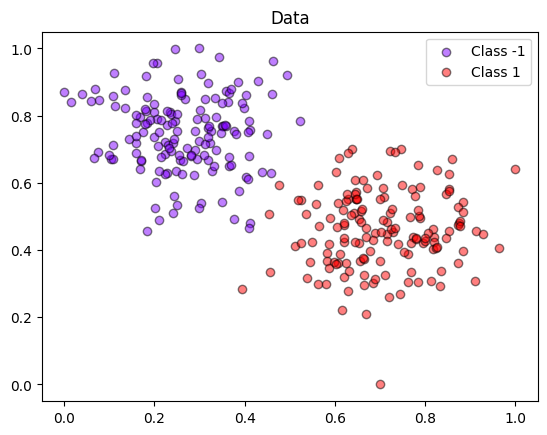

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
y = 2 * y - 1 #convert labels to -1, 1
plot_data(X, y)
pl.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Queremos encontrar una función lineal $f(x) = wx+w_0$ con parámetros $w \in \mathbb{R}^2$, $w_0 \in \mathbb{R}$. Formulamos el problema como un problema de optimización:

$$\min_{f\in H}L(f,D)$$

Donde:
* $H$ es el espacio de hipótesis definido como $H=\{f_{w, w_0}(x)=wx+w_0,\forall w\in\mathbb{R}^2 \ and \ w_0\in\mathbb{R}\}$.
* $L$ es la función de pérdida definida como $ L(f, D) =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} (f(x^{(i)}) - y^{(i)})^2 $.
* $(x^{(i)},y^{(i)})$ es una muestra de entrenamiento donde $y^{(i)}$ es la entrada y $y^{(i)}$ es la etiqueta.
* $D$ corresponde al conjunto de datos de entrenamiento.



In [ ]:
def sigmoid(z):
    """Función sigmoide."""
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
def f(w, x):
    """
    w: array de forma (3,) ➔ [w0, w1, w2]
    x: array de forma (2,)
    returns: probabilidad P(y=1|x) en (0,1)
    """
    z = np.dot(w[1:], x) + w[0]
    return sigmoid(z)

In [ ]:
def logistic_loss(w, x, y):
    """
    Binary Cross-Entropy para un solo ejemplo.
    w: array (3,)
    x: array (2,)
    y: 0 o 1
    """
    p = f(w, x)
    # para evitar log(0)
    eps = 1e-15
    p = np.clip(p, eps, 1 - eps)
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))

def batch_loss(loss_fun, w, X, Y):
    """
    Pérdida promedio sobre un batch de n muestras.
    loss_fun: la función de pérdida a usar (p.ej. logistic_loss)
    w: array (3,)
    X: array (n, 2)
    Y: array (n,)
    """
    assert X.shape[0] == Y.shape[0]
    n = X.shape[0]
    tot_loss = 0.0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss / n

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: 0.19718133980960395
Training loss: -0.07293220314712637
Test loss: 0.015691057638308407


/tmp/ipython-input-2193923289.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


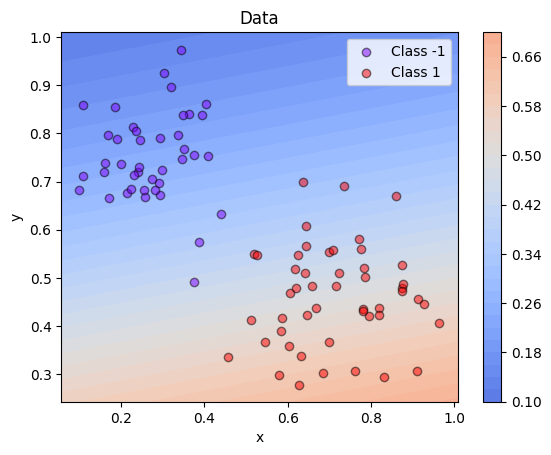

In [ ]:
w = [1, .5, -3]
x = X_train[0]
label = y_train[0]

print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(logistic_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(logistic_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

Utilizaremos descenso de gradiente para minimizar la pérdida. Para ello necesitamos calcular el gradiente de la función de pérdida con respecto a los parámetros.


$$
\begin{aligned} \frac{\partial L(f, D)}{\partial w} & =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} \frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w}  
\end{aligned}
$$
con
$$
\begin{aligned}
\frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w} & =
\frac{\partial (w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_0 - y^{(i)})^2}{\partial w} \\
& =(f_{w}(x^{(i)})-y^{(i)})\left[\begin{array}{c}
1 \\
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]
\end{aligned}
$$

A continuación, definimos una función para calcular el gradiente:

In [ ]:
def dL_dw(w, x, y):
    """
    Gradiente de la pérdida de entropía cruzada para un solo ejemplo.
    w: array (3,)
    x: array (2,)
    y: etiqueta 0 o 1
    returns: array (3,) con dL/dw0, dL/dw1, dL/dw2
    """
    # construimos x' = [1, x1, x2]
    x_prime = np.empty(len(x) + 1)
    x_prime[0] = 1
    x_prime[1:] = x

    # predicción
    p = f(w, x)

    # gradiente de cross‐entropy: (p - y) * x'
    return (p - y) * x_prime

La siguiente función implementa la optimización por descenso de gradiente:

In [ ]:
def batch_gd(X, Y, epochs, eta, w_ini):
    '''
    Gradient descent optimization
     X: numpy array of shape (n, 2) with n the number of samples.
     Y: numpy array of shape (n, ) with n the number of samples.
     epochs: number of iterations
     eta: learning rate
     w_ini: numpy array of shape (3,) with initial values for w
    Returns:
     w: final values of w
     lossess: list with loss values for each epoch
    '''
    losses = []
    w = w_ini
    n = X.shape[0] # número de ejemplos de entrenamiento
    for i in range(epochs):
        delta = np.zeros(len(w))
        for j in range(n):
            delta += dL_dw(w, X[j], Y[j]) # Vamos sumando el gradiente por cada ejemplo en el conjunto de datos
        w = w - eta * delta # Calculamos el nuevo valor de w
        losses.append(batch_loss(logistic_loss, w, X, Y)) # Vamos guardando el valor de pérdida para visualizar luego
    return w, losses

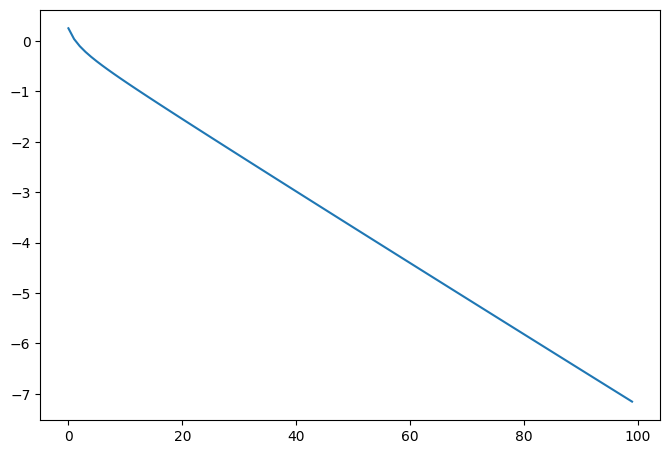

In [ ]:
w, losses = batch_gd(X_train, y_train, 100, 0.005, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: 5.360985026451812e-10
Training loss: -7.153153491846405
Test loss: -5.692867316652843


/tmp/ipython-input-2193923289.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


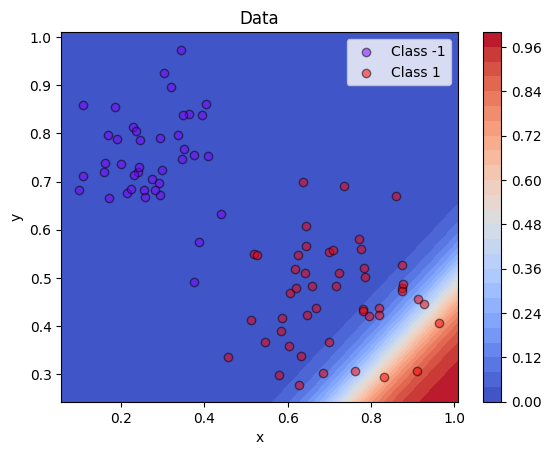

In [ ]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(f(w, x)))
print(f'Training loss: {batch_loss(logistic_loss, w, X_train, y_train)}')
print(f'Test loss: {batch_loss(logistic_loss, w, X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: f(w, [x_1, x_2]))
plot_data(X_test, y_test)

## 1. Regresióin logística

Consulte que es la regresión logística y adapte el código para hacer regresión logística.

Visualice la región de decisión. Discuta los resultados. ¿Qué cambia?

## 2. Clasificación multiclase

Adapte el código para hacer clasificación multiclase. Aplique el método al conjunto de datos Wine (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

Divida los datos en entrenamiento y prueba.

Calcule la matriz de confusion para el conjunto de prueba.

Calcule diferentes métricas de desempeño del algoritmo.

Discuta los resultados.